In [1]:
import cv2
from keras.models import load_model
import numpy as np

In [1]:
video_file = 'drive/MyDrive/video1.mp4'

In [4]:
video_file = 'drive/MyDrive/VID_20221112_015932.mp4'

In [ ]:
import cv2 as cv
import os
import numpy as np
  
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture(video_file)

# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
height, width, layers = first_frame.shape
size = (height, width)
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
arr_optical_flow = np.zeros(size)
count = 0
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
    if ret == False:
      break
    # Opens a new window and displays the input
    # frame
    #cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    cv.imwrite(os.path.join('out', 'frame' + str(count) + '.jpg'), rgb)
    arr_optical_flow += cv.cvtColor(rgb, cv.COLOR_BGR2GRAY)
    # Opens a new window and displays the output frame
    #cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    count += 1

 
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

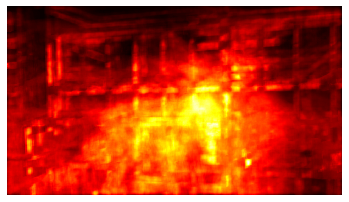

In [9]:
import matplotlib.pyplot as plt
import numpy as np


img = plt.imshow(arr_optical_flow, cmap='hot', interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
plt.savefig("heatmap.png", bbox_inches='tight')
plt.show()

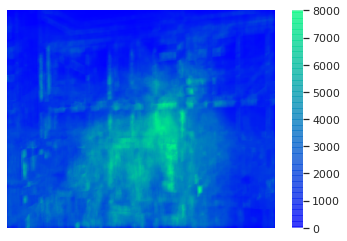

In [37]:
# add alpha (transparency) to a colormap
import matplotlib.cm
from matplotlib.colors import LinearSegmentedColormap 
wd = matplotlib.cm.winter._segmentdata # only has r,g,b  
wd['alpha'] =  ((0.0, 0.0, 0.3), 
               (0.3, 0.3, 1.0),
               (1.0, 1.0, 1.0))

# modified colormap with changing alpha
al_winter = LinearSegmentedColormap('AlphaWinter', wd) 

# get the map image as an array so we can plot it 
import matplotlib.image as mpimg 
map_img = mpimg.imread('first_frame.png') 


import seaborn as sns; sns.set()

hmax = sns.heatmap(arr_optical_flow,
            #cmap = al_winter, # this worked but I didn't like it
            cmap = matplotlib.cm.winter,
            alpha = 0.5, # whole heatmap is translucent
            annot = False,
            zorder = 2,
            )

# heatmap uses pcolormesh instead of imshow, so we can't pass through 
# extent as a kwarg, so we can't mmatch the heatmap to the map. Instead, 
# match the map to the heatmap:

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap

plt.axis('off')
plt.savefig("heatmap1.png", bbox_inches='tight')
from matplotlib.pyplot import show 
show()

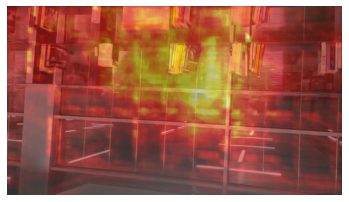

In [36]:
import matplotlib.pyplot as plt
im = plt.imread('first_frame.png')
implot = plt.imshow(im)

plt.imshow(arr_optical_flow, cmap='hot', interpolation='nearest', origin='lower', alpha=0.5)

plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')
plt.show()

In [8]:
np.save('arr_optical_flow.ar', arr_optical_flow)